In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
data = files.upload()

Saving WorldBank Renewable Energy Consumption_WorldBank Renewable Energy Consumption (1).csv to WorldBank Renewable Energy Consumption_WorldBank Renewable Energy Consumption (1).csv


In [ ]:
df = pd.read_csv('WorldBank Renewable Energy Consumption_WorldBank Renewable Energy Consumption (1).csv')

In [ ]:
df.head(3)

,Country Code,Country Name,Income Group,Indicator Code,Indicator Name,Region,Year,Energy Consump.
0,ABW,Aruba,High income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Latin America & Caribbean,1/1/1990,0.268747
1,AFG,Afghanistan,Low income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,South Asia,1/1/1990,15.924532
2,AGO,Angola,Lower middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Sub-Saharan Africa,1/1/1990,72.255252


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071 entries, 0 to 6070
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     6071 non-null   object 
 1   Country Name     6071 non-null   object 
 2   Income Group     6071 non-null   object 
 3   Indicator Code   6071 non-null   object 
 4   Indicator Name   6071 non-null   object 
 5   Region           6071 non-null   object 
 6   Year             6071 non-null   object 
 7   Energy Consump.  6071 non-null   float64
dtypes: float64(1), object(7)
memory usage: 379.6+ KB


In [ ]:
df.shape

(6071, 8)

In [ ]:
df.columns

Index(['Country Code', 'Country Name', 'Income Group', 'Indicator Code',
       'Indicator Name', 'Region', 'Year', 'Energy Consump.'],
      dtype='object')

In [ ]:
categorical_column=[]
non_categorical_column=[]
for column in df.columns:
  if df[column].dtype=='object' or df[column].dtype == 'category':
    categorical_column.append(column)
  else:
    non_categorical_column.append(column)
print('categorical_column',categorical_column)
print('\nnon_categorical_column',non_categorical_column)

categorical_column ['Country Code', 'Country Name', 'Income Group', 'Indicator Code', 'Indicator Name', 'Region', 'Year']

non_categorical_column ['Energy Consump.']


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Country Code,0
Country Name,0
Income Group,0
Indicator Code,0
Indicator Name,0
Region,0
Year,0
Energy Consump.,0


In [ ]:
df.describe()

,Energy Consump.
count,6071.000000
mean,30.467386
std,30.688168
min,0.000000
25%,3.272610
50%,18.901600
75%,52.666149
max,98.342903


In [ ]:
#lists of columns to check outliers
columns =['Energy Consump.']      #

In [ ]:
#creating a fuction to clean outliers
def clean_outliers(column):
  mean = df[column].mean()
  std_dev = df[column].std()
  lower_limit = mean - 3 * std_dev
  upper_limit = mean + 3 * std_dev
  return lower_limit, upper_limit

In [ ]:
print(clean_outliers('Energy Consump.'))

(-61.597119381721875, 122.53189101637085)


In [ ]:
# create a function to clean outlier
def clean_outliers(column):
  mean=df[column].mean()
  std_dev=df[column].std()
  threshold=3
  lower_limit=mean-threshold*std_dev
  upper_limit=mean+threshold*std_dev
  return df[(df[column]>=lower_limit)&(df[column]<=upper_limit)]
  print(df)

In [ ]:
print(df)

     Country Code       Country Name         Income Group  Indicator Code  \
0             ABW              Aruba          High income  EG.FEC.RNEW.ZS   
1             AFG        Afghanistan           Low income  EG.FEC.RNEW.ZS   
2             AGO             Angola  Lower middle income  EG.FEC.RNEW.ZS   
3             ALB            Albania  Upper middle income  EG.FEC.RNEW.ZS   
4             AND            Andorra          High income  EG.FEC.RNEW.ZS   
...           ...                ...                  ...             ...   
6066          GNQ  Equatorial Guinea  Upper middle income  EG.FEC.RNEW.ZS   
6067          GAB              Gabon  Upper middle income  EG.FEC.RNEW.ZS   
6068          MUS          Mauritius  Upper middle income  EG.FEC.RNEW.ZS   
6069          NAM            Namibia  Upper middle income  EG.FEC.RNEW.ZS   
6070          ZAF       South Africa  Upper middle income  EG.FEC.RNEW.ZS   

                                         Indicator Name  \
0     Renewable 

In [ ]:
# the transformed data new variable name is "new clean data"
for column in columns:
   new_df=clean_outliers(column)

In [ ]:
new_df.describe()

,Energy Consump.
count,6071.000000
mean,30.467386
std,30.688168
min,0.000000
25%,3.272610
50%,18.901600
75%,52.666149
max,98.342903


In [ ]:
new_df.shape

(6071, 8)

In [ ]:
new_df.columns

Index(['Country Code', 'Country Name', 'Income Group', 'Indicator Code',
       'Indicator Name', 'Region', 'Year', 'Energy Consump.'],
      dtype='object')

In [ ]:
new_df.head(3)

,Country Code,Country Name,Income Group,Indicator Code,Indicator Name,Region,Year,Energy Consump.
0,ABW,Aruba,High income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Latin America & Caribbean,1/1/1990,0.268747
1,AFG,Afghanistan,Low income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,South Asia,1/1/1990,15.924532
2,AGO,Angola,Lower middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Sub-Saharan Africa,1/1/1990,72.255252


Encoding the new dataset


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
from pickle import encode_long

encode_columns=['Country Code', 'Country Name', 'Income Group', 'Indicator Code', 'Indicator Name', 'Region', 'Year']
for column in encode_columns:
  new_df[column]=le.fit_transform(new_df[column])
  print(new_df[column])

0         0
1         1
2         2
3         3
4         4
       ... 
6066     74
6067     66
6068    133
6069    136
6070    210
Name: Country Code, Length: 6071, dtype: int64
0         9
1         0
2         5
3         1
4         4
       ... 
6066     58
6067     68
6068    124
6069    133
6070    173
Name: Country Name, Length: 6071, dtype: int64
0       0
1       1
2       2
3       3
4       0
       ..
6066    3
6067    3
6068    3
6069    3
6070    3
Name: Income Group, Length: 6071, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
6066    0
6067    0
6068    0
6069    0
6070    0
Name: Indicator Code, Length: 6071, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
6066    0
6067    0
6068    0
6069    0
6070    0
Name: Indicator Name, Length: 6071, dtype: int64
0       2
1       5
2       6
3       1
4       1
       ..
6066    6
6067    6
6068    6
6069    6
6070    6
Name: Region, Length: 6071, dtype: int64
0        0
1    

In [ ]:
new_df.head(3)


,Country Code,Country Name,Income Group,Indicator Code,Indicator Name,Region,Year,Energy Consump.
0,0,9,0,0,0,2,0,0.268747
1,1,0,1,0,0,5,0,15.924532
2,2,5,2,0,0,6,0,72.255252


Checking for duplicates

In [ ]:

new_df.duplicated().sum()


0

In [ ]:
# Drop 'Indicator Code' column
new_df = new_df.drop('Indicator Code', axis=1)
# Drop 'Indicator Name' column
new_df = new_df.drop('Indicator Name', axis=1)

In [ ]:
X= new_df.drop('Energy Consump.',axis=1)
y=new_df['Energy Consump.']

In [ ]:
x = new_df[['Country Code', 'Country Name', 'Income Group','Region', 'Year']] #feature variable/independent variable
y = new_df['Energy Consump.']#target variable

In [ ]:

from sklearn.model_selection import train_test_split

# Assuming 'x' and 'y' are your feature and target variables as defined in your code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split the data, adjust test_size and random_state as needed

#view shape of train and test
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)
print('x_train.shape',x_train.shape) # You had a typo here, it should be x_train
print('x_test.shape',x_test.shape)

y_train.shape (4856,)
y_test.shape (1215,)
x_train.shape (4856, 5)
x_test.shape (1215, 5)


**RandomForest**

In [ ]:
#fit the model
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=0)
rfr.fit(x_train,y_train)


RandomForestRegressor(random_state=0)

In [ ]:
#print accuracy
from sklearn.metrics import r2_score
y_pred=rfr.predict(x_test)
r2_accuracy = r2_score(y_test,y_pred)
print(" Accuracy score is:", r2_accuracy)


 Accuracy score is: 0.9961080021293732


**Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
# define the parameters
param_grid = {
    'max_depth': [None,5,10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5,8, 10]
}

# create a GridSearchCV object

grid_search = GridSearchCV(rfr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

#print the best parameters and the score associated/corresponding
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9924947829062534


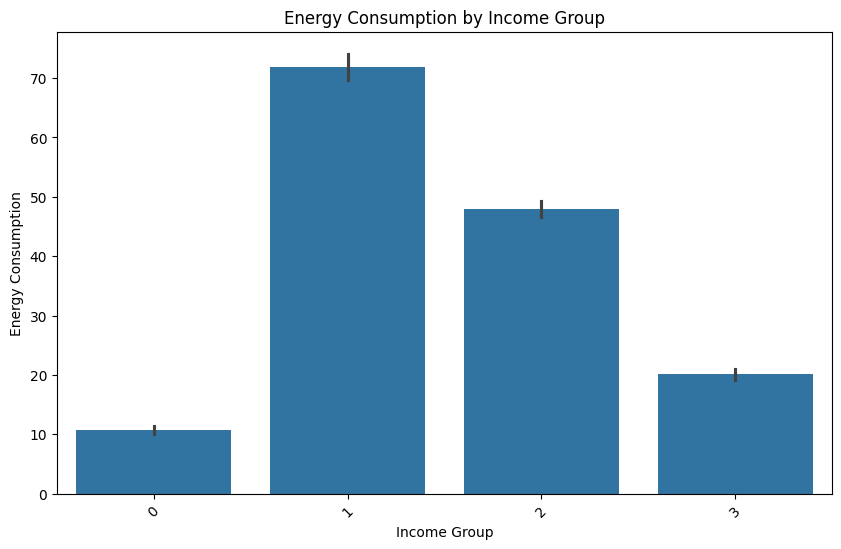

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Group', y='Energy Consump.', data=new_df) # Removed extra indentation
plt.title('Energy Consumption by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

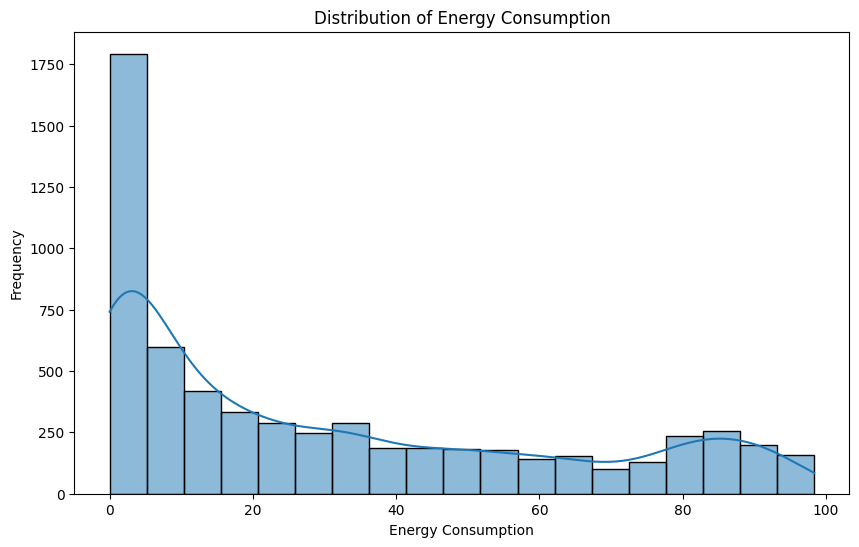

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(new_df['Energy Consump.'], kde=True) # Removed extra indentation
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()